# Comprehensive Guide on Feature Selection

<img src="./Feature-Selection.png" width="350" height="300">

参考学习链接：https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook

| 方法                     | 说明 | sklearn                       |
|:-----------------------| :--- |:------------------------------|
| **1.1.过滤法 (Filter)**   | 相关系数、卡方检验等 | SelectKBest/SelectPercentile, f_classif, chi2 |
| **1.2.包裹法 (Wrapper)**  | 递归特征消除 | RFE, RFECV                    |
| **1.3.嵌入法 (Embedded)** | 基于模型的权重 | SelectFromModel, Lasso, Tree  |

## 1.1 过滤法
---
<img src="./Feature-Selection_1.filter.png" width="600" height="600">

### 1.1.1.删除恒定特征 Remove constant/quasi-constant features
使用sklearn的VarianceThreshold函数<br>
sklearn.feature_selection.VarianceThreshold(threshold=0.0) #默认方差为0，remove the features that have the same value in all samples.<br>
threshold 可以自行设定 从而达到筛选的目的<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html <br>
**代码示列如下:**

In [25]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
print(X)
selector = VarianceThreshold(threshold=0)
selector.fit_transform(X)

[[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]


array([[2, 0],
       [1, 4],
       [1, 1]])

### 1.1.2. 按照百分比筛选 SelectPercentile
sklearn.feature_selection.SelectPercentile(f_classif, percentile=10)<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html<br>

For regression tasks: f_regression, mutual_info_regression<br>
For classification tasks: chi2, f_classif, mutual_info_classif<br>
**代码示例如下:**

In [18]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [19]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

### 1.1.3. SelectKBest:Select features according to the k highest scores
sklearn.feature_selection.SelectKBest(chi2, k=10)<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html <br>

For regression tasks: f_regression, mutual_info_regression<br>
For classification tasks: chi2, f_classif, mutual_info_classif<br>
**代码示例如下:**

In [20]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [21]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

| 函数 | 适用任务 | 适用特征 | 适用目标变量 | 衡量标准 | 选择依据 |
| :--- | :--- | :--- | :--- | :--- | :--- |
| `f_regression` | 回归 | 数值型 | 数值型 | F-test (F检验) | 衡量**两个数值型变量之间的线性关系**。如果你的特征和目标变量是线性的，这是一个非常好的选择。 |
| `mutual_info_regression` | 回归 | **数值型或类别型** | 数值型 | 互信息 (Mutual Information) | 衡量两个变量之间的**非线性关系**。它能捕捉任何类型的关系，包括非线性的。如果你的特征和目标变量是非线性的，或者特征是类别型，这是更好的选择。 |
| `chi2` | 分类 | **非负的数值型或类别型** | 类别型 | 卡方检验 (Chi-squared test) | 衡量**两个类别型变量**之间的独立性。它计算观察到的频率与期望的频率之间的差异。如果你的特征是类别型，并且你希望衡量它与目标类别的关系，就选择它。**注意：** 特征值必须是非负数。 |
| `f_classif` | 分类 | 数值型 | 类别型 | ANOVA F-test (方差分析) | 衡量**一个数值型特征与多个类别**之间的差异。它测试不同类别中特征的平均值是否显著不同。如果你的特征是数值型，目标变量是类别型，这是一个很好的默认选择。 |
| `mutual_info_classif` | 分类 | **数值型或类别型** | 类别型 | 互信息 (Mutual Information) | 衡量**两个变量之间的任何关系**（线性或非线性）。它是 `mutual_info_regression` 的分类版本。如果你不确定特征与目标变量的关系是线性的还是非线性的，这是最稳妥的选择。 |

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html
| 比较点 | **F-test** | **Mutual Information** |
| :--- | :--- | :--- |
| **衡量的关系** | **线性关系** | **线性与非线性关系** |
| **计算速度** | 较快 | 较慢 |
| **适用范围** | 适用于特征和目标变量呈线性关系的情况 | 适用于**所有情况**，包括关系未知或非线性的情况 |
| **典型应用** | **回归：** `f_regression`<br>**分类：** `f_classif` | **回归：** `mutual_info_regression`<br>**分类：** `mutual_info_classif` |

### 1.1.4:Correlation-Matrix with Heatmap

**方法**：计算每个特征与 target 的相关性，然后筛选出相关性较高的特征。<br>
**目的**：为了**降维**和**提升模型性能**，只保留与目标变量（target）强相关的特征。

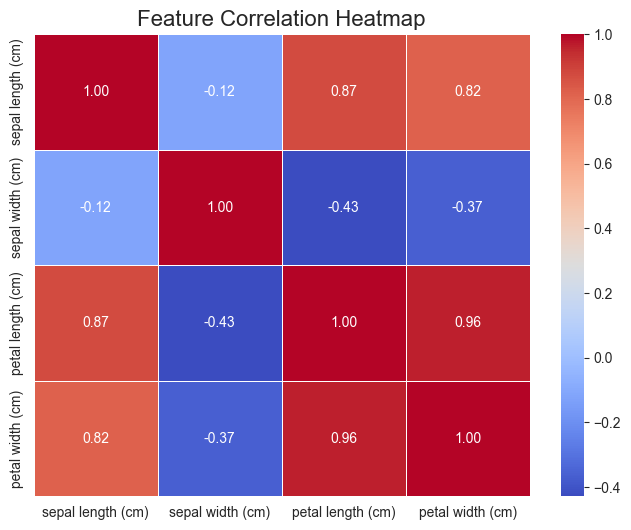


根据相关性筛选后应保留的特征:
['sepal width (cm)', 'sepal length (cm)', 'petal width (cm)']

筛选后数据集的列:
Index(['sepal width (cm)', 'sepal length (cm)', 'petal width (cm)'], dtype='object')


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def feature_selection_by_correlation(df, target, threshold=0.9):
    """
    根据特征与特征之间的相关性，筛选出冗余特征，并保留与目标最相关的。

    参数:
    df (pd.DataFrame): 包含特征和目标变量的DataFrame。
    target (str): 目标变量的列名。
    threshold (float): 相关性阈值，用于判断特征是否高度相关。

    返回:
    list: 筛选后应保留的特征列表。
    """
    # 1. 分离特征和目标变量
    features_df = df.drop(columns=[target])

    # 2. 计算特征之间的相关性矩阵
    corr_matrix = features_df.corr()

    # 3. 绘制相关性热力图（可选，用于可视化）
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Feature Correlation Heatmap', fontsize=16)
    plt.show()

    # 4. 获取特征与目标变量的相关性，用于后续决策
    feature_target_corr = df.corr()[target].drop(target)

    # 5. 找出高度相关的特征对
    upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

    # 6. 遍历高度相关对，并进行筛选
    to_drop = set()
    for col in upper_corr_matrix.columns:
        # 获取与当前列高度相关的其他列
        highly_correlated_cols = upper_corr_matrix.index[upper_corr_matrix[col].abs() > threshold].tolist()

        if highly_correlated_cols:
            # 将当前列和与其高度相关的列合并为一个候选集
            candidate_features = [col] + highly_correlated_cols

            # 在候选集中，找出与目标变量最相关的特征
            best_feature = feature_target_corr[candidate_features].abs().idxmax()

            # 将候选集中除了最优特征之外的其他特征都添加到待移除集合
            for feature in candidate_features:
                if feature != best_feature:
                    to_drop.add(feature)

    # 7. 筛选出最终要保留的特征
    all_features = set(features_df.columns)
    selected_features = list(all_features - to_drop)

    return selected_features

# ----------------- 运行示例 -----------------

# 加载 iris 数据集
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 调用函数，设置阈值为 0.9
selected_features = feature_selection_by_correlation(iris_df, target='target', threshold=0.9)

print("\n根据相关性筛选后应保留的特征:")
print(selected_features)
print("\n筛选后数据集的列:")
print(iris_df[selected_features].columns)

### 1.2.包裹法 (Wrapper)
---
<img src="./Feature-Selection_2.Wrapper.png" width="700" height="250">

### 1.3.嵌入法 (Embedded)
---
**方法**：如果两个特征（如 A 和 B）高度相关，通常只保留其中一个。筛选标准可以是选择与 target 相关性更高的那个，或者使用 **`sklearn.feature_selection.SelectFromModel`** 等自动方法进行筛选。<br>
**目的**：为了**避免信息冗余**，处理**多重共线性**。